## EPI referenceless method using entropy as cost function 
###### Author: Zimu Huo
###### Date: 07.2022

Using entropy as a measurement to reduce the EPI ghost. First separate the data into even and odd images, then find the appropriate phase shift for odd or even echos to minimise entropy. 

I tried scipy optimization, it looks like the cost is concave(as expected). Hence, I'm brute forcing it

-------------------------------------------------------------------------
References

    [1] 
    Author:  S. Clare
    Title: Iterative Nyquist Ghost Correction for Single and Multi-shot EPI using an Entropy Measure
    Link: https://cds.ismrm.org/ismrm-2003/1041.pdf

In [1]:
import twixtools
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../../')
sys.path.insert(1, '../')
from util.twix import *
from tqdm.notebook import tqdm
import scipy
from util.fft import * 
from util.entropy import * 

In [2]:
file_sms = "../lib/resource/XA31A/meas_MID00310_FID03272_zimu_B0_DF75_Mono_GRAPPA0_EPI.dat"
file = readtwix(file_sms)
FIGSIZE = (10,6)
pha = file[0]['readouts']
phaflag=file[0]['flags']
data = file[1]['readouts']
dataflag = file[1]['flags']
print(data.shape)

Software version: VD/VE (!?)

Scan  0
100 % parsed in 1 s. Estimated 0 s remaining.
Scan  1
100 % parsed in 0 s. Estimated 0 s remaining.
----------------------------------------------------------------------------------------------------
reading raw data, calculating trajectories and sampling raster 


  0%|          | 0/215 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
file parsed
----------------------------------------------------------------------------------------------------
loading and preprocessing the data..
----------------------------------------------------------------------------------------------------
dynamically combining data according to dtype, sli, par, rep..


  0%|          | 0/2 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
finished, the output is stored in a list format and each element of the list is a dictionary.
To access the data, use file[idx]["readout"] or file[idx]["flags"]
                                                                                                    
idx  file type
0   SB_EPI_NAV
1   DATA
(48, 128, 30)


In [3]:
recon = epi_phasecorrection_entropy(data)

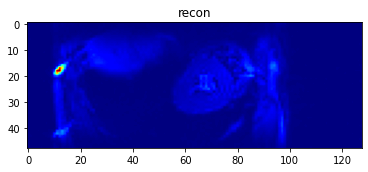

In [4]:
plt.figure()
plt.title("recon")
plt.imshow(np.abs(rsos(ifft2c(recon))), cmap ="jet")

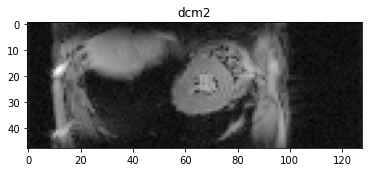

In [5]:
plt.figure()
plt.title("dcm2")
plt.imshow(np.log(np.abs(rsos(ifft2c(recon)))), cmap ="gray")